# ASSIGNMENT 10

# KMEANS 

# IRIS DATASET

In [1]:
#importing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\mamta\Desktop\DESKTOP MAMTA\STUDY BSC DATA ANALYTICS\semester 3 bsc Data Analytics\ML\IRIS.csv')
#encoding the target variables (setosa: 0,versicolor: 1,viginica: 2)
keys = data['species'].unique()
values = [i for i in range(len(keys))]
mapping = dict(zip(keys,values))
data['species'] = data['species'].replace(keys,values)
X = data.iloc[:,:4].to_numpy()
Y = data.iloc[:,-1].to_numpy()
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# FROM SKLEARN

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init="k-means++",   max_iter = 100, n_init = 10, random_state = 0) #Applying Kmeans classifier
y_kmeans = kmeans.fit_predict(X)
y_kmeans

C:\Users\mamta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

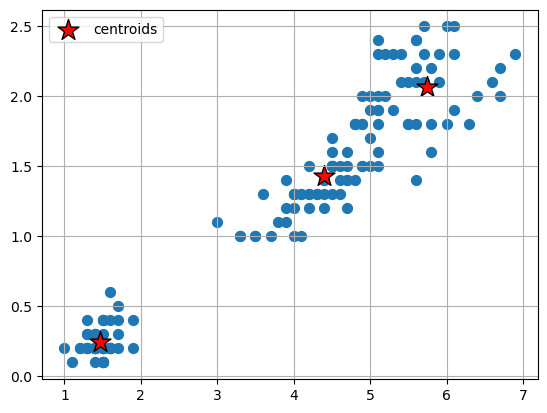

In [3]:
plt.scatter(X[:,2],X[:,3],s = 50)
#plot centroids
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s = 250,marker = '*',c = 'red',edgecolor = 'black',
           label = 'centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

C:\Users\mamta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mamta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mamta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mamta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

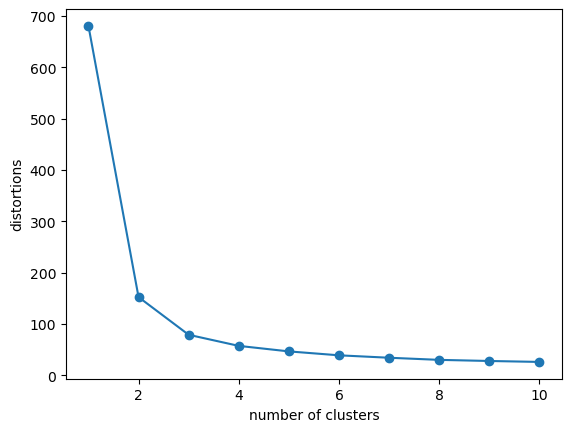

In [4]:
#elbow method
#calculate distortion for a range of number of clusters (optimal number of clusters )
#from the curve we figured out that k = 3 is the optimal number of clusters
distortions = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",   max_iter = 100, n_init = 10, random_state = 0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortions')
plt.show()

C:\Users\mamta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mamta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mamta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mamta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

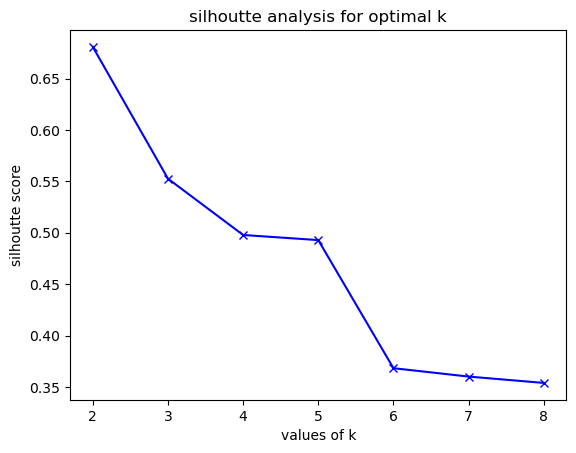

In [5]:
#silhoutte method to find optimal number of clusters
from sklearn.metrics import silhouette_score
import numpy as np
range_n_clusters= np.arange(2,9)
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,init="k-means++",   max_iter = 100, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X,cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('values of k')
plt.ylabel('silhoutte score')
plt.title('silhoutte analysis for optimal k')
plt.show()

C:\Users\mamta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


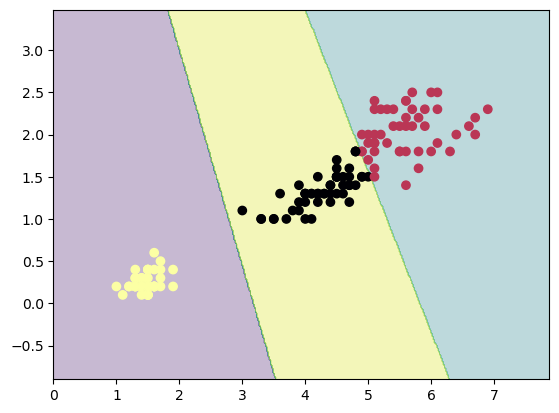

In [6]:
import pandas as pd
a = np.arange(start= min(X[:,2])-1,stop = max(X[:,2])+1,step = 0.02)
b = np.arange(start = min(X[:,3])-1,stop = max(X[:,3])+1,step = 0.02)
xx,yy = np.meshgrid(a,b)
#classifying every point on the meshgrid
input_array = np.array([xx.ravel(),yy.ravel()]).T #ravel() converts the higher dimensional arrays to one-d arrays
kmeans = KMeans(n_clusters=3,init="k-means++",   max_iter = 100, n_init = 10, random_state = 0)
fit = kmeans.fit(X[:,2:4])
y_pred = kmeans.predict(X[:,2:4])
labels = kmeans.predict(input_array)
plt.contourf(xx,yy,labels.reshape(xx.shape),alpha = 0.3)
plt.scatter(X[:,2],X[:,3],c = y_pred,cmap = 'inferno_r')


# FROM SCRATCH

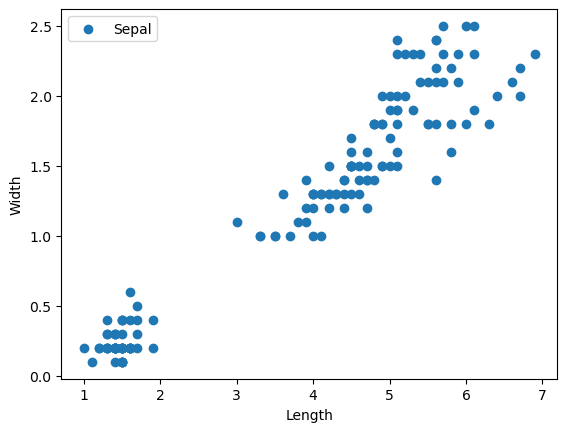

In [7]:
#plot of sepal length and sepal width of classes
plt.scatter(data.iloc[:,2],data.iloc[:,3],label = 'Sepal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

In [8]:
def initialize_centroids(num_clusters,data):
    centroids = []
    for centroid in range(num_clusters):
        centroid = np.random.uniform(data.min().min(),data.max().max(),data.shape[1])
        centroids.append(centroid)
    centroids = pd.DataFrame(centroids,columns = data.columns)
    return centroids
centroids = initialize_centroids(3,data.iloc[:,:4])
centroids

,sepal_length,sepal_width,petal_length,petal_width
0,6.117537,3.893068,3.668288,5.927219
1,4.288626,1.219571,0.297867,5.355685
2,4.174689,4.484118,7.689193,3.318864


In [9]:
def calculate_error(a,b):
    error = np.sqrt(np.sum((a-b)**2))
    return error

In [10]:
errors = np.array([])
for centroid in range(centroids.shape[0]):
    error = calculate_error(centroids.iloc[centroid,:4],data.iloc[0,:4])
    errors = np.append(errors,error)
errors

array([6.25588104, 5.8012472 , 7.14884285])

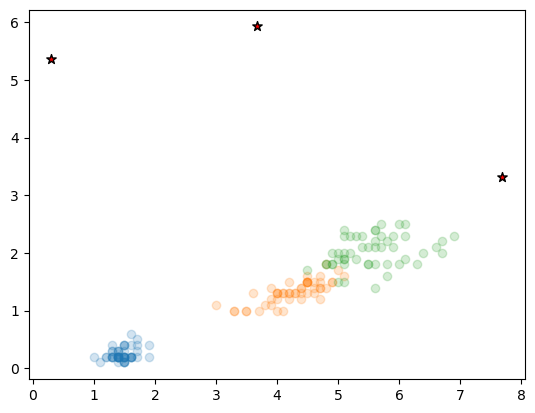

In [11]:
for i in range(3):
    plt.scatter(data[data['species']==i].iloc[:,2], data[data['species']==i].iloc[:,3],  marker = 'o', alpha = 0.2)
plt.scatter(centroids.iloc[:,2],centroids.iloc[:,3],s = 50,marker = '*',c = 'red',edgecolor = 'black',
           label = 'centroids')

In [12]:
def centroid_shifting(data,centroids):
    new_centroids = []
    centroid_errors = []
    for i in range(data.shape[0]):
        errors = np.array([])
        for j in range(centroids.shape[0]):
            error = calculate_error(centroids.iloc[j,:4],data.iloc[i,:4])
            errors = np.append(errors,error)
        closest_centroid = np.where(errors ==np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)
        new_centroids.append(closest_centroid)
        centroid_errors.append(centroid_error)
    return (new_centroids,centroid_errors)
data['centroid'],data['error'] = centroid_shifting(data.iloc[:,:4],centroids)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,centroid,error
0,5.1,3.5,1.4,0.2,0,1,5.801247
1,4.9,3.0,1.4,0.2,0,1,5.598168
2,4.7,3.2,1.3,0.2,0,1,5.628204
3,4.6,3.1,1.5,0.2,0,1,5.626649
4,5.0,3.6,1.4,0.2,0,1,5.828231


In [13]:
def kmeans(data,k):
    centroids = initialize_centroids(k,data)
    error = []
    wcss= []
    temp = True
    i = 0
    while temp:
        data['centroid'],iter_error = centroid_shifting(data,centroids)
        error.append(sum(iter_error))
        centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)
        if(len(error)<2):
            temp = True
        else:
            if (round(error[i],3)!=round(error[i-1],3)):
                temp = True
            else:
                temp = False
        i +=1
    data['centroid'],iter_error = centroid_shifting(data,centroids)
    centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)
    return (data['centroid'],iter_error,centroids,error[-1])
data['centroid'],_,centroids,_= kmeans(data.drop(['centroid','error'],axis = 1),3)

In [14]:
def kmeans_reiteration(data):
    classifications = []
    errors = []
    centroids = []

    for i in range(10):

        np.random.seed(i)

        iter_class, iter_error, iter_centroid,_ = kmeans(data,3)

        classifications.append(iter_class)
        errors.append(sum(np.square(iter_error)))
        centroids.append(iter_centroid)
    errors = np.array(errors)
    best_ind = np.where(errors == errors.min())[0].tolist()[0]

    data['centroid'] = classifications[best_ind]
    return data['centroid'],errors,centroids,best_ind
data['centroid'],errors,centroids,best_ind = kmeans_reiteration(data.drop(['centroid','error'],axis = 1))

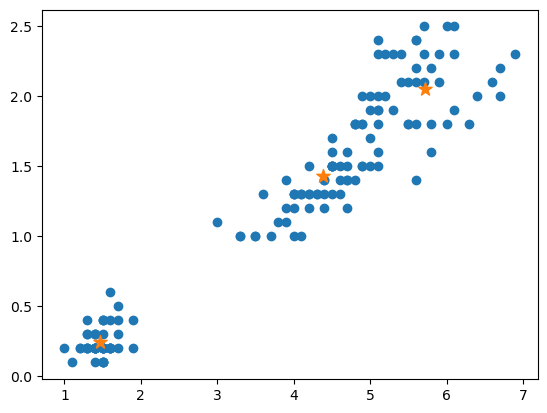

In [15]:
plt.scatter(data.iloc[:,2], data.iloc[:,3],  marker = 'o')
plt.scatter(centroids[best_ind].iloc[:,2], centroids[best_ind].iloc[:,3],  marker = '*',s = 100) 

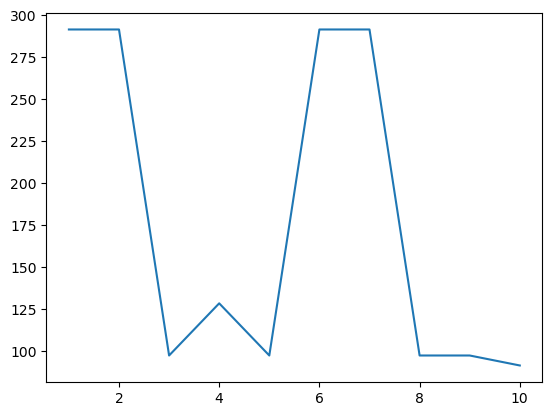

In [16]:
#elbow curve from scratch
from scipy.spatial.distance import cdist
distortions = []
for i in range(2,12):
    _,_,centroid,error = kmeans(data.drop(['centroid','error'],axis = 1),i)
    distortions.append(np.sum(error))
plt.plot(range(1,11),distortions)
plt.show()

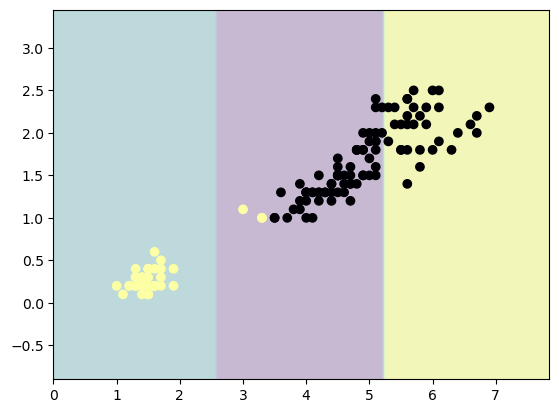

In [17]:
#decision boundary from scratch
import pandas as pd
a = np.arange(start= min(X[:,2])-1,stop = max(X[:,2])+1,step = 0.05)[:200]
b = np.arange(start = min(X[:,3])-1,stop = max(X[:,3])+1,step = 0.05)[:200]
xx,yy = np.meshgrid(a,b)
#classifying every point on the meshgrid
input_array = np.array([xx.ravel(),yy.ravel()]).T #ravel() converts the higher dimensional arrays to one-d arrays
a,errors,centroid,_ = kmeans(data.drop(['centroid','error'],axis = 1),3)
y_pred = a.to_numpy()
labels,c,d,_ = kmeans(pd.DataFrame(input_array),3)
labels = labels.to_numpy()
plt.contourf(xx,yy,labels.reshape(xx.shape),alpha = 0.3)
plt.scatter(X[:,2],X[:,3],c = y_pred,cmap = 'inferno_r')

# MNIST

# SKLEARN

In [18]:
#preparing the dataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784',version = 1)
data,target = mnist['data'].to_numpy(dtype = 'int'),mnist['target'].to_numpy(dtype = 'int')

C:\Users\mamta\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [19]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(2)
transformed_data = pca.fit_transform(data)

In [20]:
classifier= KMeans(n_clusters = 10,init = 'random',n_init = 10,max_iter = 50,tol = 1e-04,random_state = 0)
y_pred = classifier.fit_predict(transformed_data)
y_pred

array([7, 9, 0, ..., 0, 5, 9])

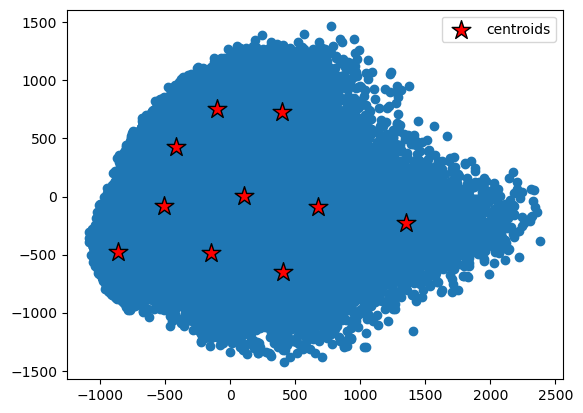

In [21]:

plt.scatter(transformed_data[:,0],transformed_data[:,1])
plt.scatter(classifier.cluster_centers_[:,0],classifier.cluster_centers_[:,1],s = 200,marker = '*',c = 'red',edgecolor = 'black',
           label = 'centroids')
plt.legend()
plt.show()

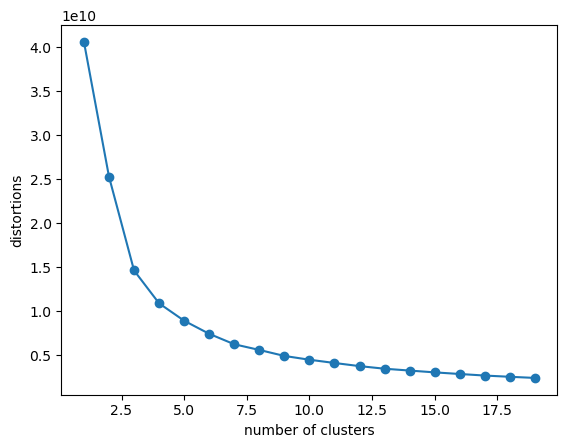

In [22]:
#elbow method
#calculate distortion for a range of number of clusters (optimal number of clusters )
distortions = []
for i in range(1,20):
    classifier = KMeans(n_clusters=i,init = 'random',n_init = 10,max_iter = 50,tol = 1e-04,random_state = 0)
    classifier.fit(transformed_data)
    distortions.append(classifier.inertia_)
plt.plot(range(1,20),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortions')
plt.show()

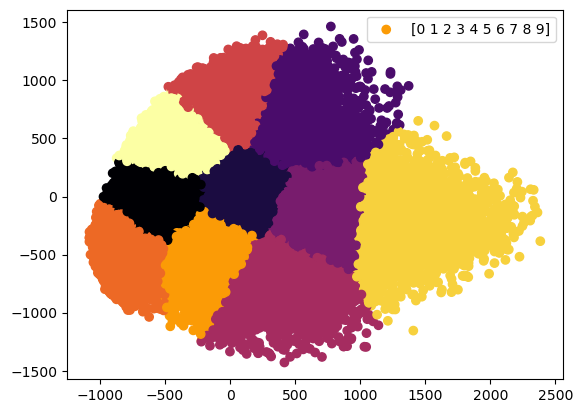

In [23]:
#plot of decision boundary
#plotting decision boundary from all the data having 70000 rows is creating memory error that's why used slicing to select
#a few rows for plotting
a = np.arange(start= min(transformed_data[:,0])-1,stop = max(transformed_data[:,0])+1,step = 0.05)[10000:20000]
b = np.arange(start = min(transformed_data[:,1])-1,stop = max(transformed_data[:,1])+1,step = 0.05)[10000:20000]
xx,yy = np.meshgrid(a,b)
#classifying every point on the meshgrid
input_array = np.array([xx.ravel(),yy.ravel()]).T #ravel() converts the higher dimensional arrays to one-d arrays
km = KMeans(n_clusters = 10,init = 'k-means++',n_init = 10,max_iter = 300,tol = 1e-04,random_state = 100)
fit = km.fit(transformed_data)
y_pred = km.predict(transformed_data)
labels = km.predict(input_array) 
plt.contourf(xx,yy,labels.reshape(xx.shape),alpha = 0.3)
plt.scatter(transformed_data[:,0],transformed_data[:,1],c = y_pred,cmap = 'inferno_r',label = np.unique(y_pred))
plt.legend()
plt.show()

# SCRATCH

In [24]:
data = pd.DataFrame(transformed_data)

In [25]:
def initialize_centroids(num_clusters,data):
    centroids = []
    for centroid in range(num_clusters):
        centroid = np.random.uniform(data.min().min(),data.max().max(),data.shape[1])
        centroids.append(centroid)
    centroids = pd.DataFrame(centroids,columns = data.columns)
    return centroids
centroids = initialize_centroids(10,data.iloc[:,:4])
centroids

,0,1
0,-1188.300325,152.883348
1,190.872025,1242.201171
2,-666.428993,1641.705866
3,2036.447291,-31.086801
4,558.971197,-721.353113
5,2177.236683,1404.502154
6,1622.125124,2282.281315
7,264.014825,1944.657446
8,1723.017901,-1107.747704
9,-202.273654,644.031021


In [26]:
def calculate_error(a,b):
    error = np.sqrt(np.sum((a-b)**2))
    return error

In [27]:
errors = np.array([])
for centroid in range(centroids.shape[0]):
    error = calculate_error(centroids.iloc[centroid,0],data.iloc[0,1])
    errors = np.append(errors,error)
errors

array([ 872.07549039,  507.09685998,  350.20415836, 2352.67212557,
        875.19603171, 2493.46151767, 1938.34995865,  580.23965936,
       2039.2427363 ,  113.95118084])

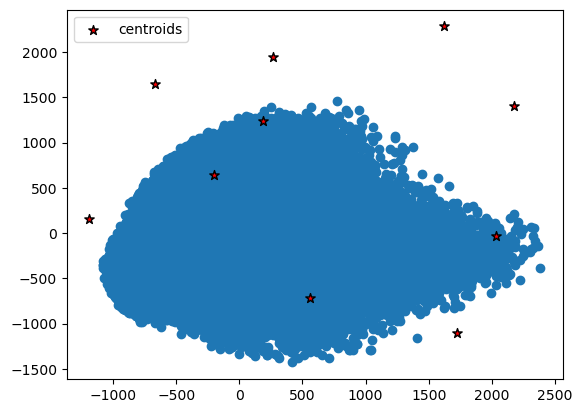

In [28]:
plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o')
plt.scatter(centroids.iloc[:,0],centroids.iloc[:,1],s = 50,marker = '*',c = 'red',edgecolor = 'black',
           label = 'centroids')
plt.legend()
plt.show()

In [29]:
def centroid_shifting(data,centroids):
    new_centroids = []
    centroid_errors = []
    for i in range(data.shape[0]):
        errors = np.array([])
        for j in range(centroids.shape[0]):
            error = calculate_error(centroids.iloc[j,:4],data.iloc[i,:4])
            errors = np.append(errors,error)
        closest_centroid = np.where(errors ==np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)
        new_centroids.append(closest_centroid)
        centroid_errors.append(centroid_error)
    return (new_centroids,centroid_errors)
data['centroid'],data['error'] = centroid_shifting(data,centroids)
data.head()

,0,1,centroid,error
0,122.253473,-316.224835,4,595.693959
1,1010.502530,-289.991648,4,624.462376
2,-59.004242,393.716867,9,288.415152
3,-796.957325,-607.447549,0,855.132982
4,-391.312972,729.785921,9,207.580747


In [30]:
def kmeans(data,k):
    centroids = initialize_centroids(k,data)
    error = []
    wcss= []
    temp = True
    i = 0
    while temp:
        data['centroid'],iter_error = centroid_shifting(data,centroids)
        error.append(sum(iter_error))
        centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)
        if(len(error)<2):
            temp = True
        else:
            if (round(error[i],3)!=round(error[i-1],3)):
                temp = True
            else:
                temp = False
        i +=1
    data['centroid'],iter_error = centroid_shifting(data,centroids)
    centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)
    return (data['centroid'],iter_error,centroids,error[-1])
data['centroid'],_,centroids,_ = kmeans(data.drop(['centroid','error'],axis = 1),10)

KeyboardInterrupt: 

In [ ]:
def kmeans_reiteration(data):
    classifications = []
    errors = []
    centroids = []

    for i in range(10):

        np.random.seed(i)

        iter_class, iter_error, iter_centroid,_ = kmeans(data,10)

        classifications.append(iter_class)
        errors.append(sum(np.square(iter_error)))
        centroids.append(iter_centroid)
    errors = np.array(errors)
    best_ind = np.where(errors == errors.min())[0].tolist()[0]

    data['centroid'] = classifications[best_ind]
    return data['centroid'],errors,centroids,best_ind
data['centroid'],errors,centroids,best_ind = kmeans_reiteration(data.drop(['centroid','error'],axis = 1))

In [ ]:
plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o')
plt.scatter(centroids[best_ind].iloc[:,0], centroids[best_ind].iloc[:,1],  marker = '*')

In [ ]:
#elbow curve from scratch
distortions = []
for i in range(2,12):
    _,_,centroid,error = kmeans(data.drop(['centroid','error'],axis = 1),i)
    distortions.append(np.sum(np.square(error)))
plt.plot(range(1,11),distortions)
plt.show()

In [ ]:
#decision boundary from scratch
import pandas as pd
a = np.arange(start= min(X[:,2])-1,stop = max(X[:,2])+1,step = 0.02)[:100]
b = np.arange(start = min(X[:,3])-1,stop = max(X[:,3])+1,step = 0.02)[:100]
xx,yy = np.meshgrid(a,b)
#classifying every point on the meshgrid
input_array = np.array([xx.ravel(),yy.ravel()]).T #ravel() converts the higher dimensional arrays to one-d arrays
a,errors,centroid,_ = kmeans(data.drop(['centroid','error'],axis = 1),3)
y_pred = a.to_numpy()[:100]
labels,c,d,_ = kmeans(pd.DataFrame(input_array),3)
labels = labels.to_numpy()
plt.contourf(xx,yy,labels.reshape(xx.shape),alpha = 0.3)
plt.scatter(X[:100,2],X[:100,3],c = y_pred,cmap = 'inferno_r')